In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/dataset3'

In [ ]:
import os

In [ ]:
print(os.listdir(folder_path))

['Google_Stock_Price_Train.csv', 'Google_Stock_Price_Test.csv']


In [ ]:
file_path = '/content/drive/My Drive/dataset3/Google_Stock_Price_Train.csv'

# Load the CSV file into a DataFrame
dataset_train = pd.read_csv(file_path)
training_set=dataset_train.iloc[:,1:2].values #we are just getting second column (open)

**Data** **Preprocessing**

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
X_train=[]
y_train=[]
for i in range(60,1198):
  X_train.append(training_set_scaled[i-60:i,0]) # 0 is for column
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
#Reshaping to add new dimension
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


Building RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor=Sequential() #Initializing the RNN-Creates an empty neural network model to which layers will be added sequentially.


In [ ]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#second LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
#third LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
#fourth(and last) LSTM layer
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units=1))

Compiling RNN

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
#loss for regression is mean squared error

Fitting RNN to training set

In [ ]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0016
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0015
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0012
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0014
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0014
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0013
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - loss: 0.0014
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0014
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0013
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0013
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0014
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0012
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0013
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0013
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 

MAKING REDICTIONS

In [ ]:
file_path = '/content/drive/My Drive/dataset3/Google_Stock_Price_Test.csv'
dataset_test= pd.read_csv(file_path)

In [ ]:
#Getting real stock price of 2017
real_stock_price=dataset_test.iloc[:,1:2].values #we are just getting second column (open)

In [ ]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [ ]:
X_test=[]
for i in range(60,80):   #test set has only 20 financial days
  X_test.append(inputs[i-60:i,0]) # 0 is for column
X_test=np.array(X_test)

In [ ]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
pred_stock_price=regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
pred_stock_price=sc.inverse_transform(pred_stock_price)

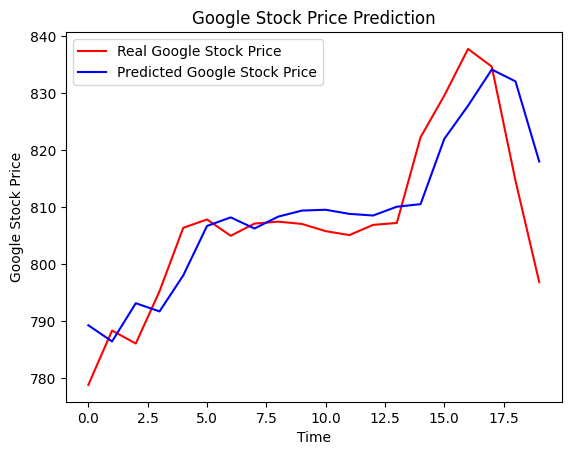

In [ ]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(pred_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# Save the model
regressor.save("google_stock_price_model.h5")

# Load the model (if needed later)
from keras.models import load_model
regressor = load_model("google_stock_price_model.h5")


In [ ]:
# Save real and predicted stock prices to a CSV file
results = pd.DataFrame({
    'Real Stock Price': real_stock_price.flatten(),
    'Predicted Stock Price': pred_stock_price.flatten()
})
results.to_csv("predicted_vs_real_stock_prices.csv", index=False)
print("Results saved to predicted_vs_real_stock_prices.csv")


Results saved to predicted_vs_real_stock_prices.csv
